In [132]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

In [133]:
data = pd.read_csv('HR_comma_sep.csv')

In [134]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [136]:
column = data.pop('left')
data.insert(9,'Left',column)

In [137]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


<Axes: xlabel='salary'>

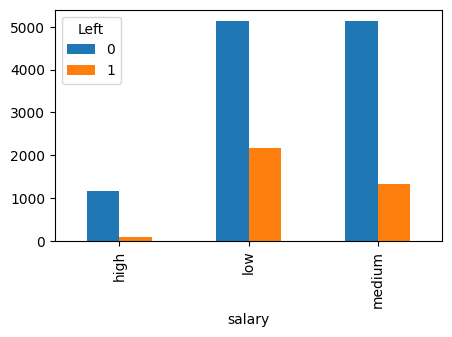

In [138]:
pd.crosstab(data.salary,data.Left).plot(kind='bar',figsize= (5,3))

<Axes: xlabel='Department'>

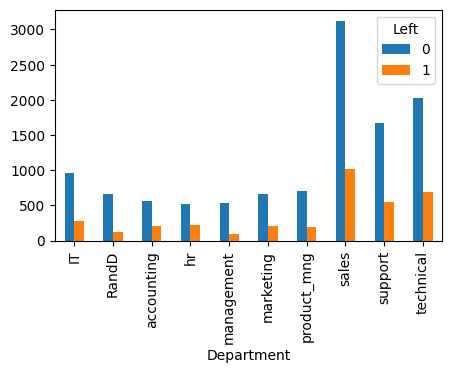

In [139]:
pd.crosstab(data.Department,data.Left).plot(kind='bar',figsize= (5,3))

In [140]:
# data.pop('Department')
data.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Left
0,0.38,0.53,2,157,3,0,0,sales,low,1


In [141]:
dummy_data = pd.get_dummies(data.salary)
dummy_data.head(2)

,high,low,medium
0,0,1,0
1,0,0,1


In [142]:
x = pd.concat([data.iloc[:,:7],dummy_data.iloc[:,:2]],axis = 'columns' )

In [143]:
y = data.Left

In [144]:
model = LogisticRegression()

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33)

In [146]:
model.fit(X_train,y_train)
import warnings
warnings.filterwarnings('ignore')

In [147]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [148]:
model.score(X_test,y_test)

0.7884848484848485